<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/220225_HW_3b_DNN_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO Object Detection



CMPE 252 HW 3b

Cory Randolph

2/25/2022

# Prompt

2. For an object detection problem, assume you are designing a YOLO like model to do the job. Your input image size is 127 x 127 (RGB). We are looking for a 3x3 output grid size. The number of classes is 20 and for each cell in the grid, we are considering 2 anchors. Design the CNN network and as a designer feel free to set your network's hyperparameters as you wish. 

# Design Overview

Since the point of this assignment is not to re-create an entire Yolo model from scratch, I will share high level design ideas given the context, and provide pseudo code where applicable.

## Input

The input is a 127x127 image with RGB. So the total input (non-trainable) parameters are (127x127x3 = 48,387)

In [1]:
input_dimensions = 127*127*3
input_dimensions

48387

## CNN Network

For designing the CNN portion of Yolo I would use the Keras Sequential model to define the desired archichitecture used for classification.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten

Define some of the parameters as variables to be used in the Sequential model.

Since this is focusing on the classification of the model I will only have 20 dimensions for classification and 5 will be dummy outputs for the bounding boxes (5 additional output parameters) would come from a different part of the model.

In [12]:
# 127x127 RGB input image
input_dimensions = 127*127*3

# Number of classes to be predicted
output_dimetions = 3*3*25 # 3x3 grid, then 20 classes plus 5 bounding box parameters

In [13]:
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(filters = 64, kernel_size= (7, 7), strides=(1, 1), input_shape =(127, 127, 3), padding = 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

# 2nd Conv Layer
model.add(Conv2D(filters=128, kernel_size= (3, 3), padding = 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))


# 3rd Conv Layer
model.add(Conv2D(filters=256, kernel_size= (3, 3), padding = 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

# 4th Conv Layer
model.add(Conv2D(filters=512, kernel_size= (3, 3), padding = 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

# Add a Dense layer to get the final output
model.add(Flatten())
model.add(Dense(16, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dimetions, activation='relu'))

# reshape to fit the desired dimensions (3x3 gird with 25 classes)
model.add(tf.keras.layers.Reshape((3,3,25)))


Display the overall architecture of the model with the summary function.

In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 127, 127, 64)      9472      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 256)     

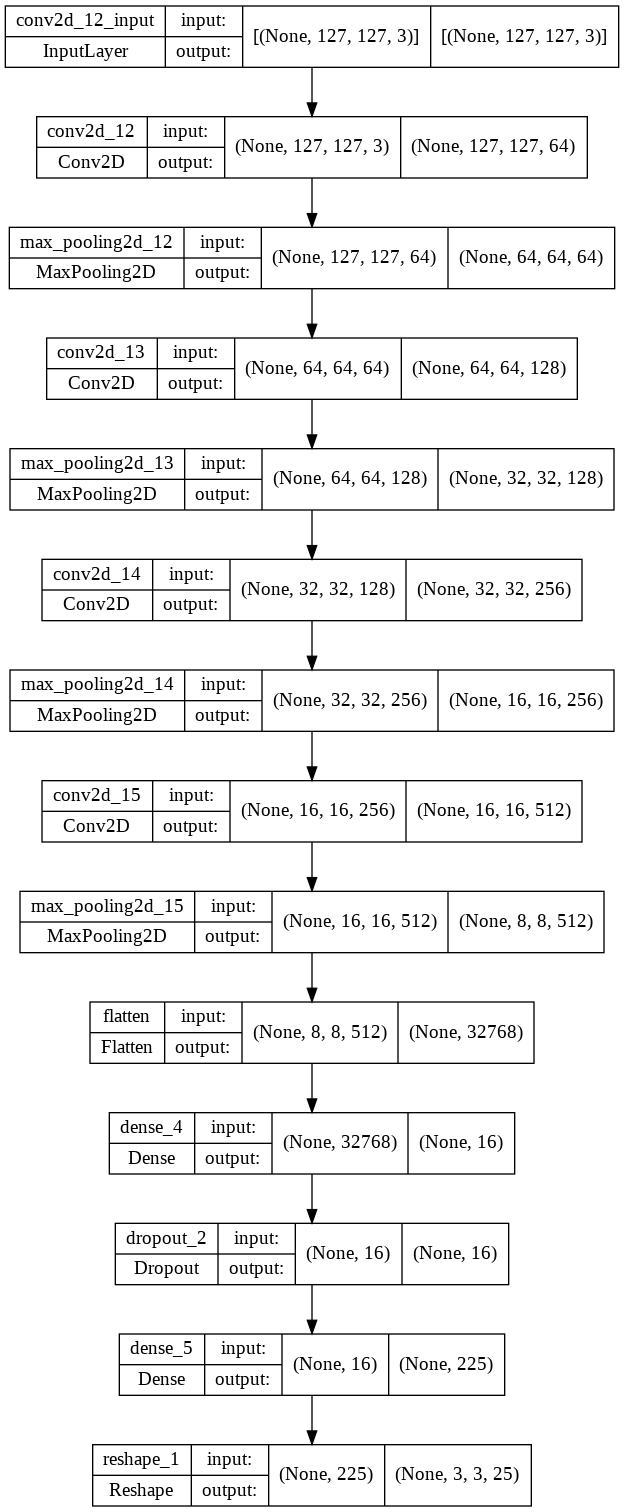

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)#, rankdir="LR")

## Output

Sine we need construct an output grid of 3x3 with 2 anchor boxes and 20 classes, our final output will be:

**3x3x2x25**

For an explanation:

* 3x3 comes from the output grid size

* x2 comes from the number of anchor boxes we have

* x25 comes from the 20 classes we have plus the 5 additional YOLO output (Probability of class, box x location, box y location, box height, box width + 20 classes) 

# Reference

Andrew Ng CNN reference [video](https://www.youtube.com/watch?v=9s_FpMpdYW8&ab_channel=DeepLearningAI)

How to Perform Object Detection With YOLOv3 in Keras
by Jason Brownlee on May 27, 2019 in Deep Learning for Computer Vision [Article](https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/)
